# Seaborn


* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips=sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


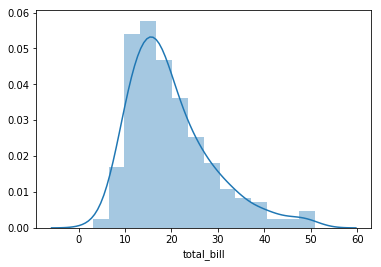

In [6]:
sns.distplot(tips['total_bill'])
# shows the kernel density estimation (KDE) Curve

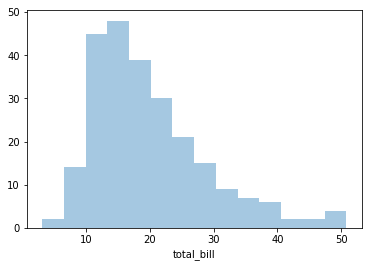

In [7]:
sns.distplot(tips['total_bill'],kde=False)

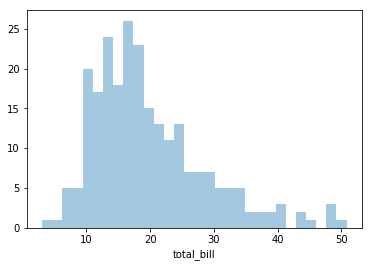

In [8]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

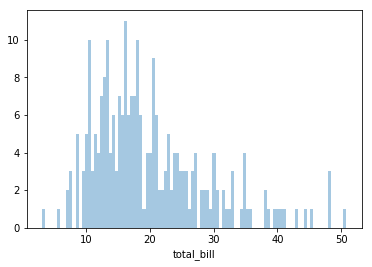

In [9]:
sns.distplot(tips['total_bill'],kde=False,bins=100)

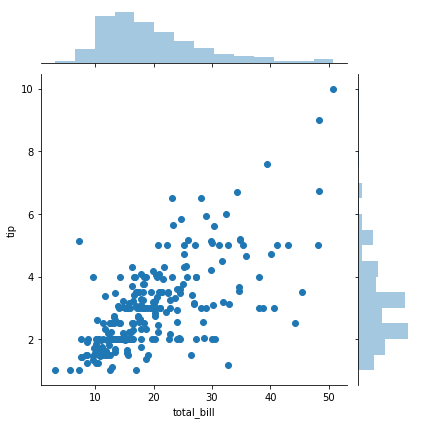

In [10]:
sns.jointplot(x='total_bill',y='tip',data=tips)

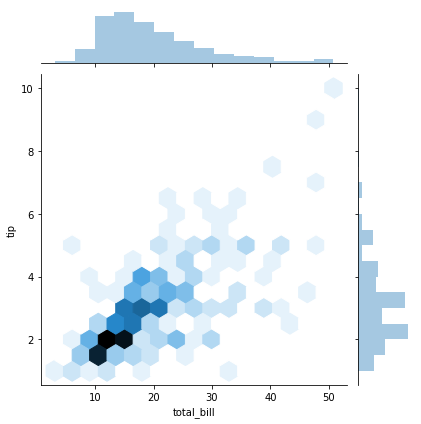

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

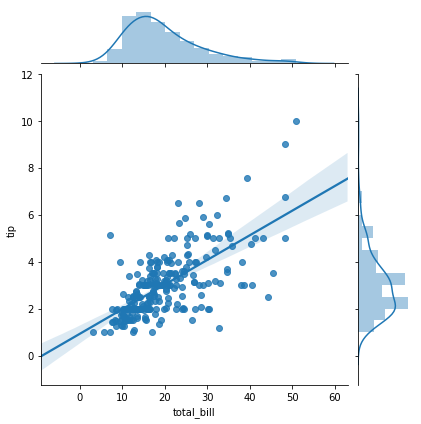

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

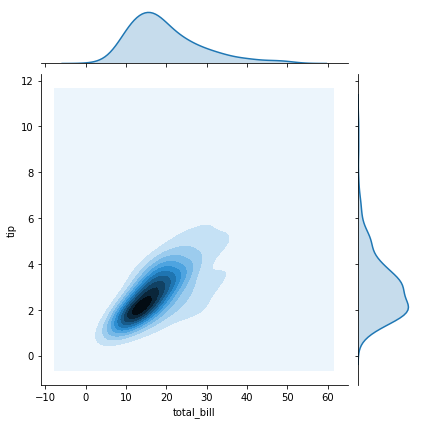

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

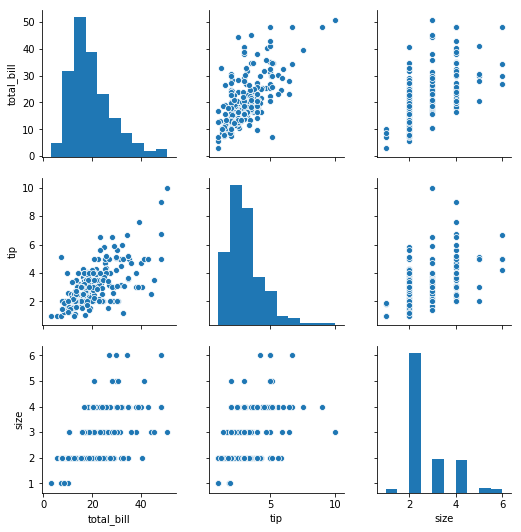

In [14]:
sns.pairplot(tips)

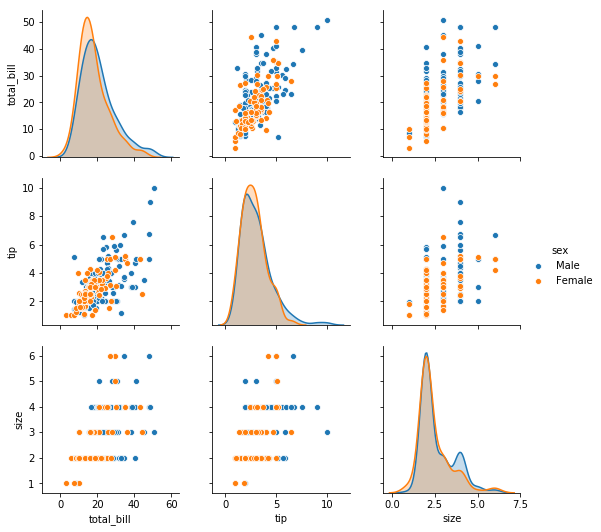

In [15]:
sns.pairplot(tips,hue='sex')

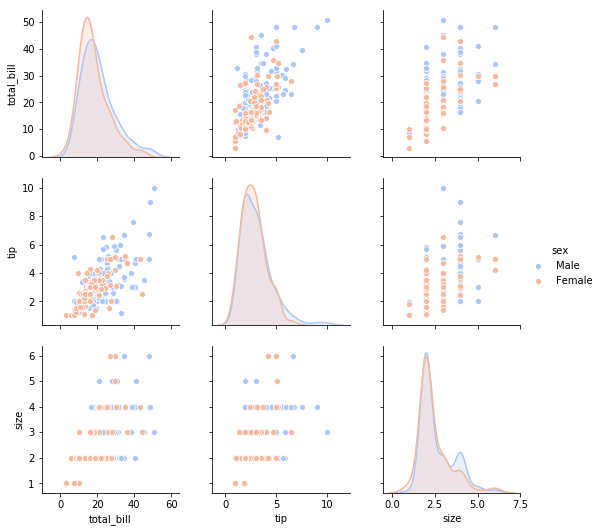

In [16]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

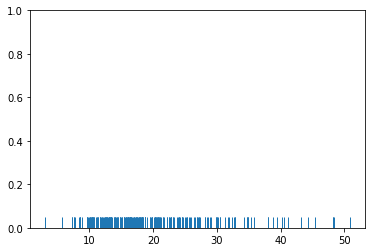

In [17]:
sns.rugplot(tips['total_bill'])

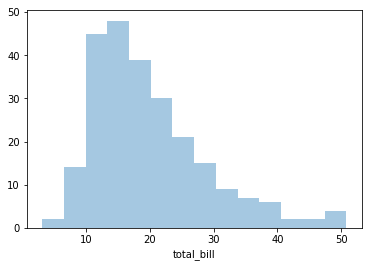

In [20]:
sns.distplot(tips['total_bill'],kde=False)

(0, 1)

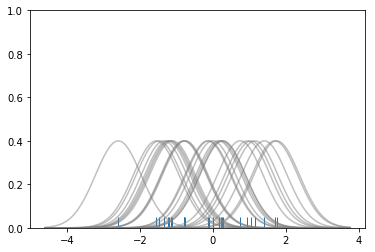

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

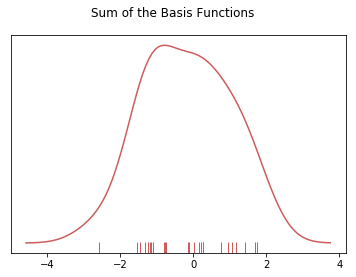

In [22]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

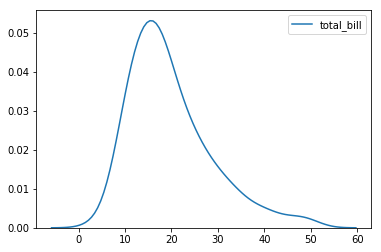

In [23]:
sns.kdeplot(tips['total_bill'])

## Categorical Plots

In [25]:
import seaborn as sns
%matplotlib inline
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


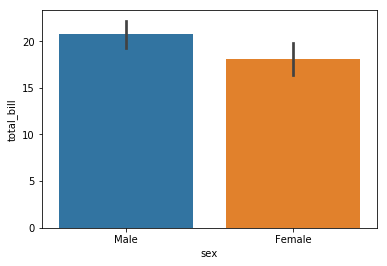

In [27]:
sns.barplot(x='sex',y='total_bill',data=tips)

In [28]:
import numpy as np

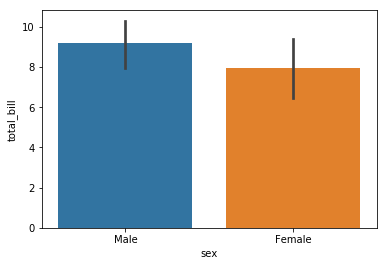

In [29]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

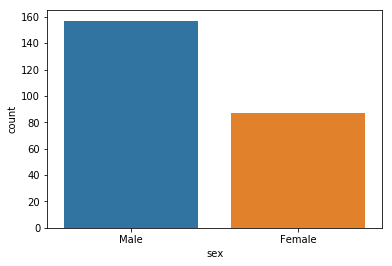

In [30]:
sns.countplot(x='sex',data=tips)

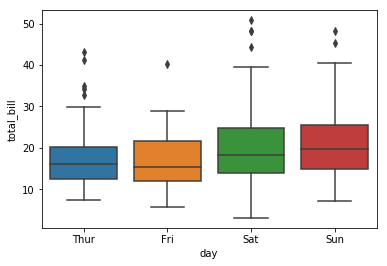

In [31]:
sns.boxplot(x='day',y='total_bill',data=tips)

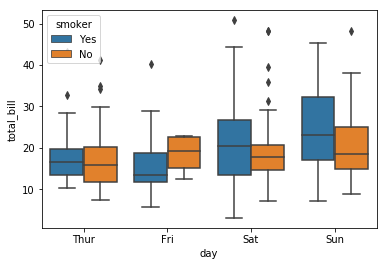

In [32]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

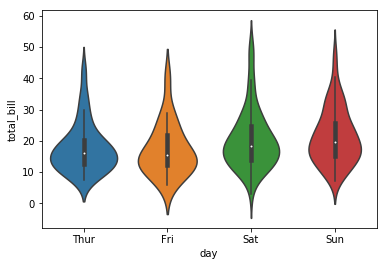

In [33]:
sns.violinplot(x='day',y='total_bill',data=tips)

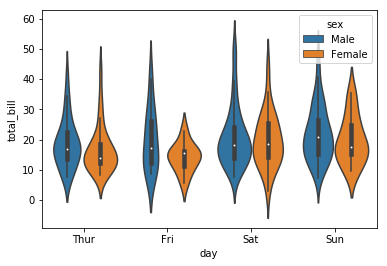

In [34]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex')

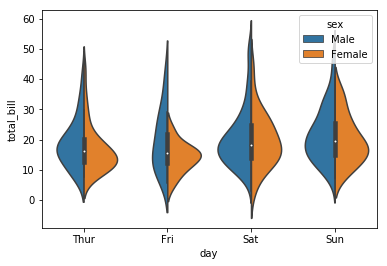

In [36]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

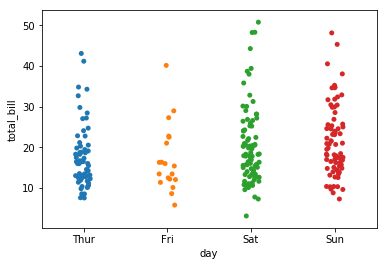

In [37]:
sns.stripplot(x='day',y='total_bill',data=tips)

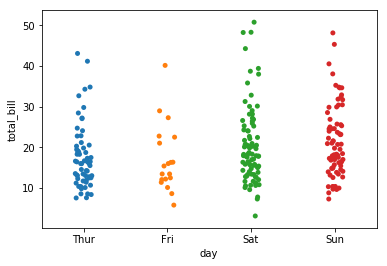

In [38]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)

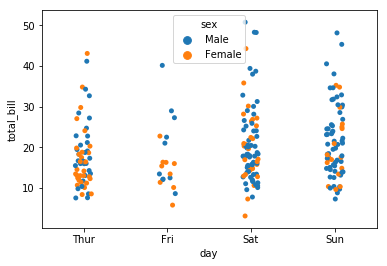

In [39]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex')

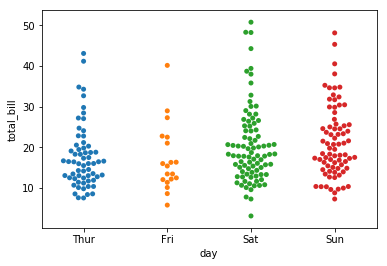

In [40]:
sns.swarmplot(x='day',y='total_bill',data=tips)

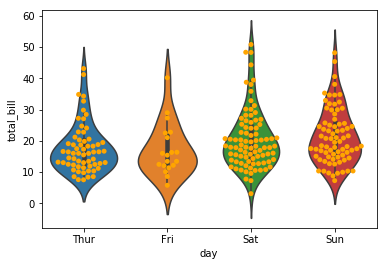

In [41]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='orange')

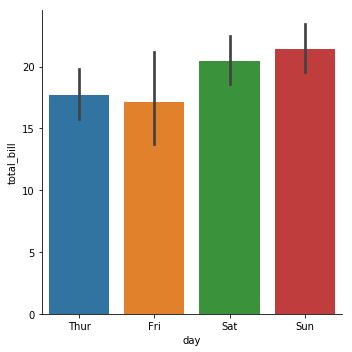

In [43]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

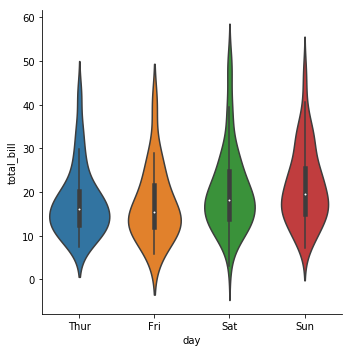

In [44]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='violin')

## Matrix Plot

In [47]:
import seaborn as sns
%matplotlib inline
tips=sns.load_dataset('tips')
flights=sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [48]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [51]:
tc=tips.corr()

In [53]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


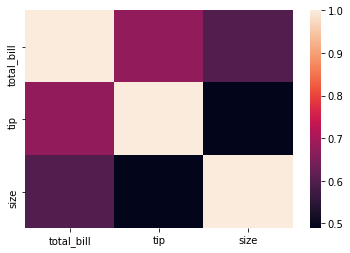

In [52]:
sns.heatmap(tc)

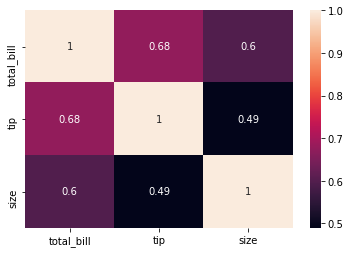

In [54]:
sns.heatmap(tc,annot=True)

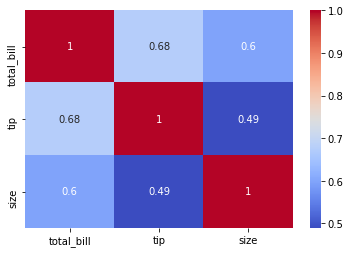

In [56]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [57]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [66]:
fp=flights.pivot_table(index='month',columns='year',values='passengers')

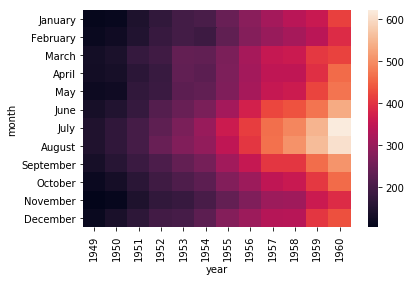

In [60]:
sns.heatmap(fp)

In [67]:
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


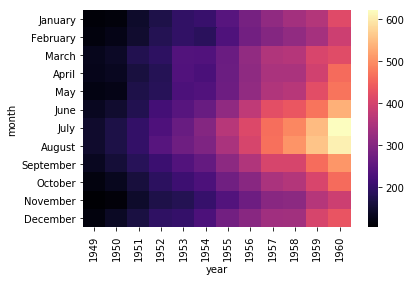

In [61]:
sns.heatmap(fp,cmap='magma')

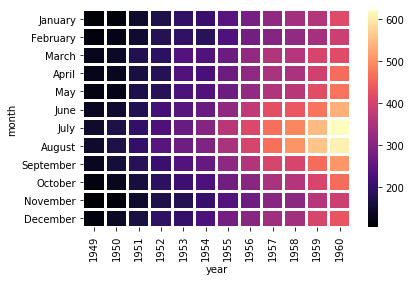

In [62]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidth=2)

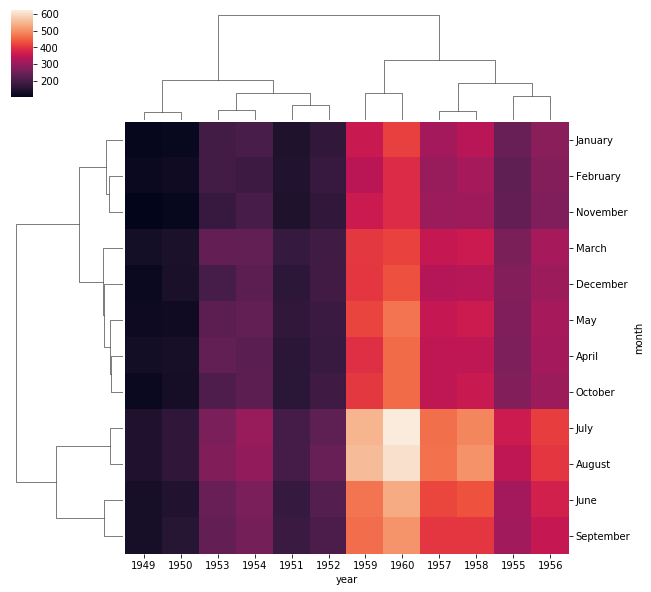

In [63]:
sns.clustermap(fp)

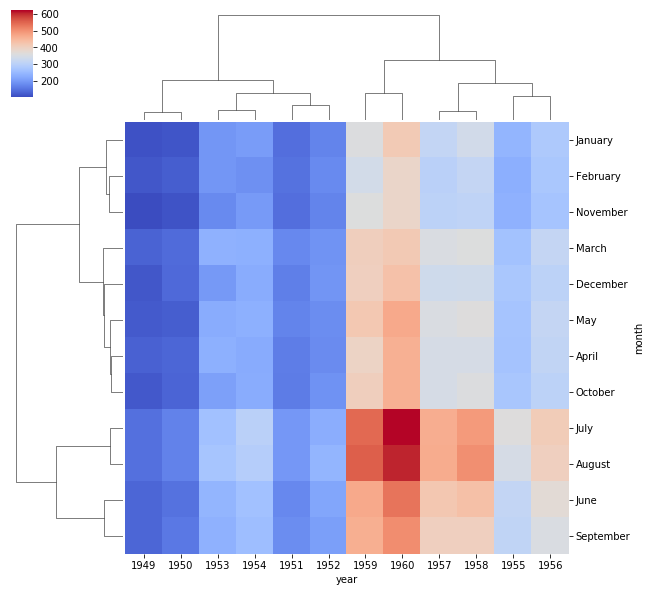

In [64]:
sns.clustermap(fp,cmap='coolwarm')

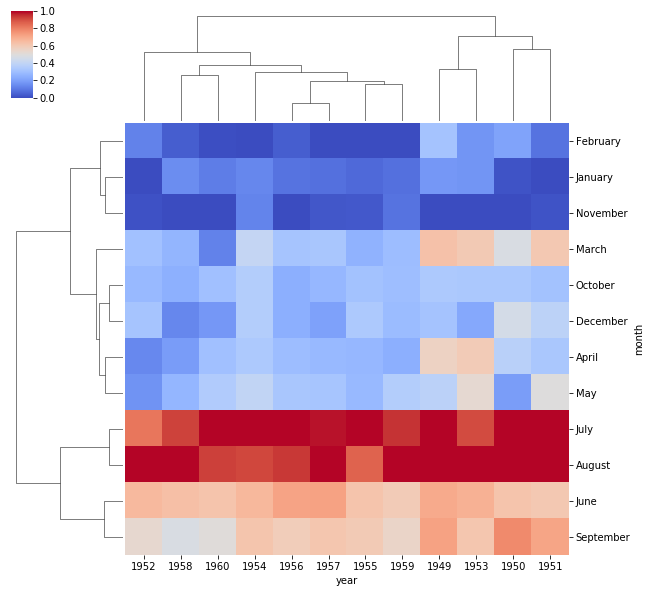

In [65]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)